# 필수과제1
- NA값이 있는 데이터를 공유할 예정 
- 해당 NA값들을 위의 나온 방법을 가지고 실제 결측치를 대체해 주세요.
- 결측치를 대체한 후에 groupby를 통한 다른 피처들과의 관계를 비교하면서 값들이 어떤 식으로 대체되었는지를 정리해 주세요.

### 필수과제 1-2
- 기존의 원본데이터와, NA값을 대체한 데이터들의 차이를 비교해서 정리해 주세요.


- 필수과제 데이터를 드리면서, 원본데이터를 드릴 예정, 여러분들이 직접 NA값의 구간을 만들어서 원본데이터에서, NA값을 만들고 그 후에 이제 비교분석을 하셔야 합니다.

- 추가적으로 시각화를 통해서 도메인에 따른 결측치 처리를 분석하면서 공유하셔도 됩니다.

#결측값 컬럼
MedInc 소득 컬럼에 대해 결측치를 만들고 과제 진행해 주세요.

#피처 설명

MedInc: 해당 지역의 중간 소득. 이 값은 수천 달러 단위로 표현됩니다. 중간 소득이 높을수록 해당 지역의 주민들은 더 많은 돈을 벌고 있다는 것을 의미합니다.

HouseAge: 해당 지역의 중앙값 주택 연령. 이는 지역에 있는 주택들 중간의 연령을 나타냅니다.

AveRooms: 지역의 평균 방 갯수. 이 값은 해당 지역의 모든 주택의 방 수를 평균낸 것입니다.

AveBedrms: 지역의 평균 침실 갯수. 이 값은 해당 지역의 모든 주택의 침실 수를 평균낸 것입니다.

Population: 해당 지역의 인구. 이는 해당 지역에 살고 있는 사람들의 수를 나타냅니다.

AveOccup: 평균 주택 점유율. 이는 한 주택에 평균적으로 거주하는 사람의 수를 나타냅니다.

Latitude: 해당 지역의 위도입니다.

Longitude: 해당 지역의 경도입니다.

Target: 이는 해당 지역의 중앙값 주택 가격을 나타냅니다. 이 값은 수십만 달러 단위로 표현됩니다.

In [292]:
# !! pip install fancyimpute
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

In [293]:
#꼭 읽어주세요!
#사이킷런 제공하는 캘리포니아 집값 데이터 셋 불러오는 코드
from sklearn.datasets import fetch_california_housing
# 캘리포니아 주택 가격 데이터셋 로드
housing = fetch_california_housing()
# 데이터프레임 생성
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Target'] = housing.target  # 목표 변수 추가

---
# 필수과제 1-2

In [305]:
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [306]:
df_housing.columns # 칼럼확인

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [316]:
df_housing.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object

In [307]:
df_housing.isna().sum() # 결측치 확인

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

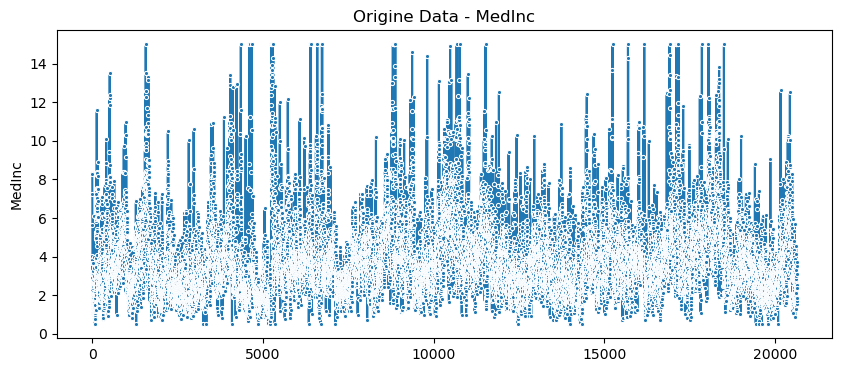

In [308]:
# 원본데이터 시각화
plt.figure(figsize=(10,4))
sns.lineplot(data=df_housing['MedInc'], marker='.')
plt.title('Origine Data - MedInc')
plt.show()

In [309]:
df_test = pd.DataFrame(df_housing['MedInc']) # 중위소득만 담기

df_test

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [310]:
# 결측치를 만들기
for i in range(20, len(df_test), 1000) :
    df_test.loc[i:i+300, 'MedInc'] = np.nan

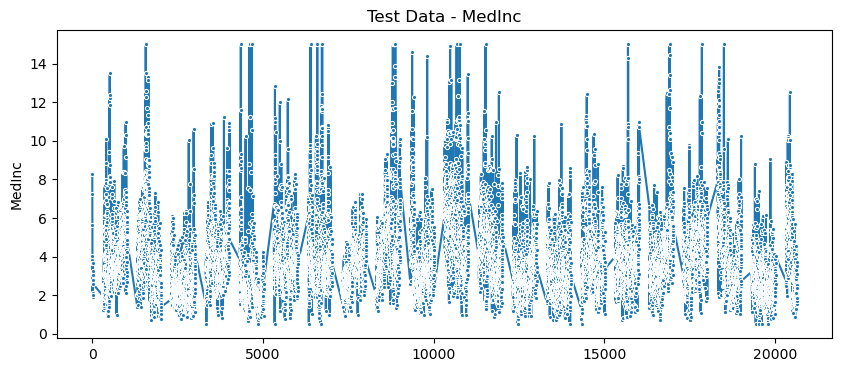

In [311]:
# 시각화 해서 결측치 확인
plt.figure(figsize=(10,4))
sns.lineplot(data=df_test['MedInc'], marker='.')
plt.title('Test Data - MedInc')
plt.show()

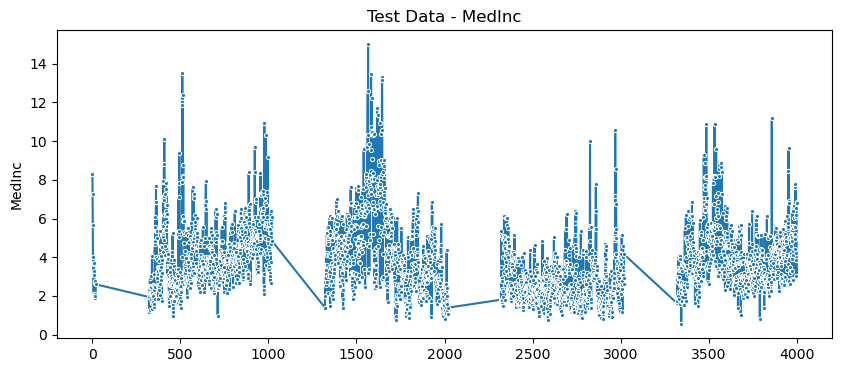

In [312]:
# 일부분만 크롭해서 결측치 잘 들어갔나 확인
plt.figure(figsize=(10,4))
sns.lineplot(data=df_test['MedInc'].loc[0:4000], marker='.')
plt.title('Test Data - MedInc')
plt.show()

In [313]:
# 1. 1차 선형보간법, interpolate
df_linear = df_test.interpolate(method = 'linear')

# 2. 2차 선형보간법, interpolate
df_quadratic = df_test.interpolate(method = 'quadratic')

# 3. 평균대치법
imputer_mean = SimpleImputer(strategy='mean')
df_mean = imputer_mean.fit_transform(df_test) #sklearn 제공하는 simpleimputer로 평균대치
df_mean = pd.DataFrame(df_mean)

# 4.0값으로 대체 
# fillna() 이 안에 원하는 값을 넣을 수 있다.
df_zero = df_test.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df_test)
df_knn = pd.DataFrame(df_knn)

# 6. MICE 다중대치법
mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체 
df_mice = mice_imputer.fit_transform(df_test)
df_mice = pd.DataFrame(df_mice)

Text(0.5, 1.0, 'df_mice')

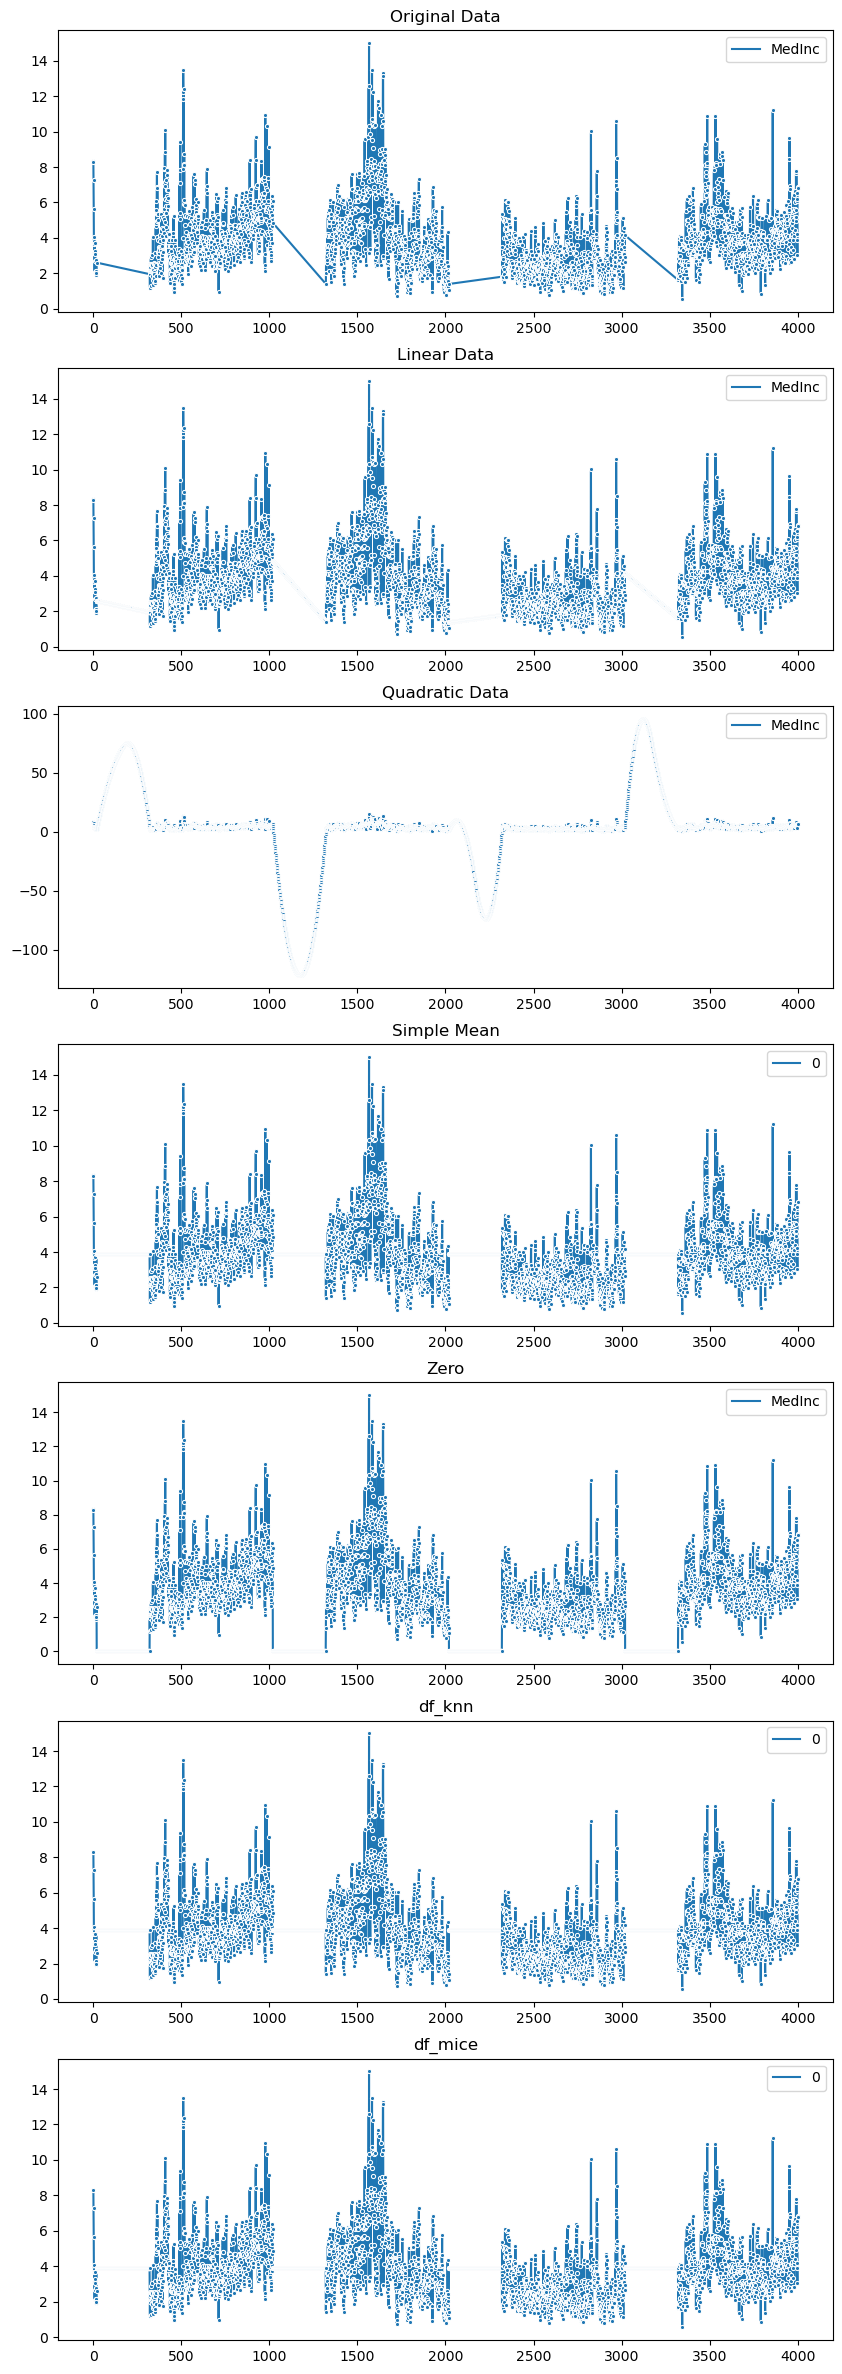

In [314]:
# 시각화
fig, axs = plt.subplots(7,1,figsize=(10,30))
sns.lineplot(data= df_test.loc[0:4000], marker='.', ax=axs[0], legend='auto')
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear.loc[0:4000], marker='.', ax=axs[1], legend='auto')
axs[1].set_title('Linear Data')
sns.lineplot(data=df_quadratic.loc[0:4000], marker='.', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic Data')
sns.lineplot(data=df_mean.loc[0:4000] , marker='.', ax=axs[3], legend='auto')
axs[3].set_title('Simple Mean')
sns.lineplot(data=df_zero.loc[0:4000] , marker='.', ax=axs[4], legend='auto')
axs[4].set_title('Zero')
sns.lineplot(data=df_knn.loc[0:4000] , marker='.', ax=axs[5], legend='auto')
axs[5].set_title('df_knn')
sns.lineplot(data=df_mice.loc[0:4000] , marker='.', ax=axs[6], legend='auto')
axs[6].set_title('df_mice')

Text(0.5, 1.0, 'df_mice')

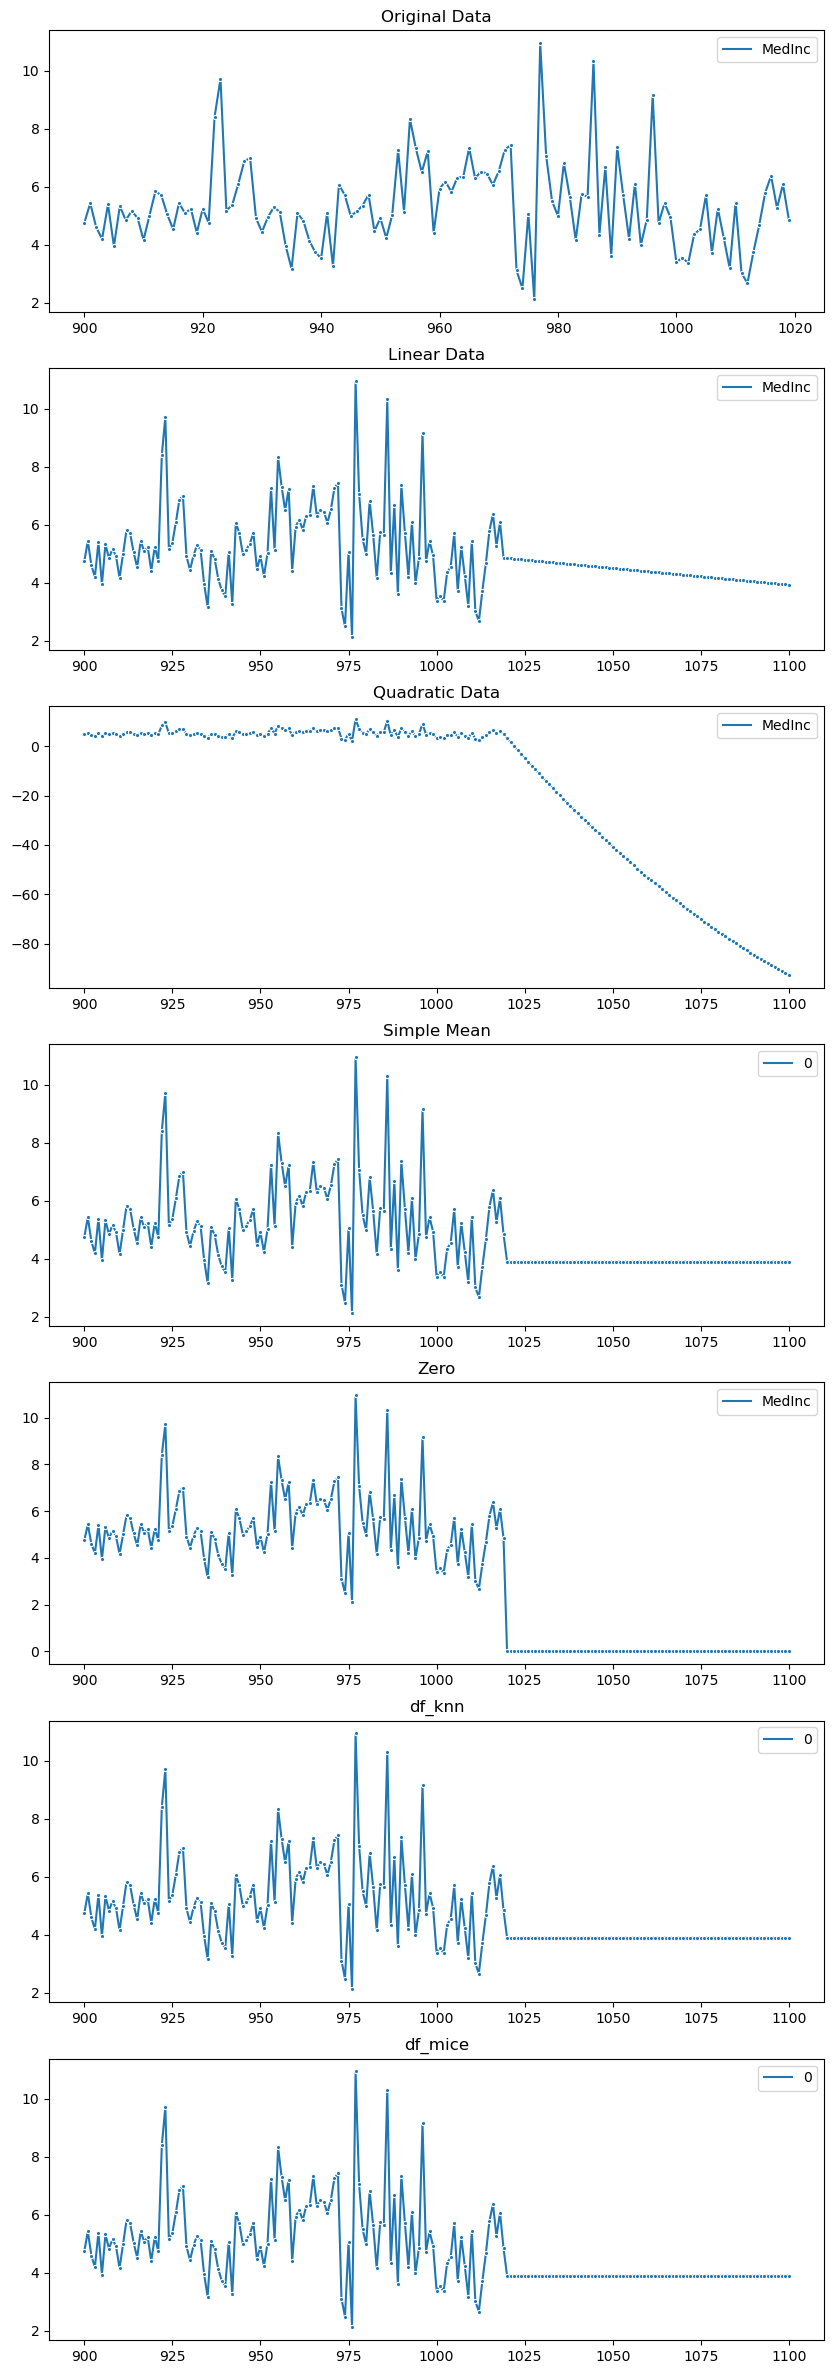

In [315]:
# 특정 부분만 시각화

fig, axs = plt.subplots(7,1,figsize=(10,30))
sns.lineplot(data= df_test.loc[900:1100], marker='.', ax=axs[0], legend='auto')
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear.loc[900:1100], marker='.', ax=axs[1], legend='auto')
axs[1].set_title('Linear Data')
sns.lineplot(data=df_quadratic.loc[900:1100], marker='.', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic Data')
sns.lineplot(data=df_mean.loc[900:1100] , marker='.', ax=axs[3], legend='auto')
axs[3].set_title('Simple Mean')
sns.lineplot(data=df_zero.loc[900:1100] , marker='.', ax=axs[4], legend='auto')
axs[4].set_title('Zero')
sns.lineplot(data=df_knn.loc[900:1100] , marker='.', ax=axs[5], legend='auto')
axs[5].set_title('df_knn')
sns.lineplot(data=df_mice.loc[900:1100] , marker='.', ax=axs[6], legend='auto')
axs[6].set_title('df_mice')

- Linear method의 경우, null 공간을 그래프상 일직선으로 그어 값을 메김
- Quadratic method의 경우, 값이 곡선이긴 하나 극단적인 값들이 나와 사용하기에 어려움이 있음
- Simple Mean, Knn, Mice method들의 경우 약 4로 같은 값을 나타냄
- Zero method는 결측값을 0으로 메꾼 것을 확인할 수 있음